In [18]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm

from matplotlib import gridspec
from pylab import *

% matplotlib inline

In [2]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/*.nc'))
print("%s"%(nc_filename))

['/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/ANHA4-ENG3_gridT_y1983_chl.nc']


In [4]:
grid=nc.Dataset(nc_filename[0])
chl=grid.variables['chl'][:]
chl=np.average(chl[:,0:16,:,:],axis=1)
print chl.shape

(73, 800, 544)


In [3]:
grid=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc')

tmask=grid.variables['tmask'][:]
nav_lon=grid.variables['nav_lon'][:]
nav_lat=grid.variables['nav_lat'][:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][:,:]

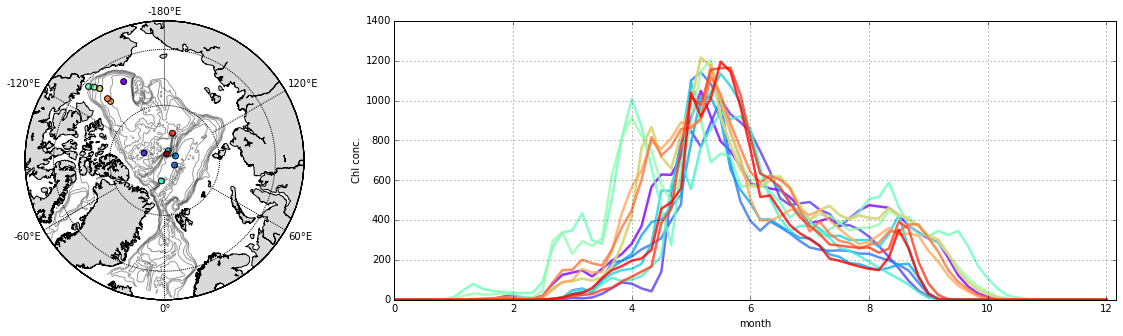

The right planel shows Chl conc. in 1983 at different sample locations


In [174]:
# locate points
xLoc=[313+400,205+400,200+400,216+400,221+400,168+400,303+400,302+400,300+400,300+400,280+400,284+400,650,615]
yLoc=[210,268,323,320,306,310,150,160,170,170,191,185,305,305]


# plot
n = np.arange(len(xLoc))
colors = cm.rainbow(np.linspace(0, 1, len(n)))

fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 3)
axes = fig.add_subplot(gs[1:])
for N,c in zip(n,colors):
    plt.plot(chl[:,xLoc[N],yLoc[N]],color=c,lw=2.5,alpha=0.8)
plt.ylabel('Chl conc.')
plt.xlabel('month')
plt.xlim(0,73)
plt.xticks(np.linspace(0, 72, 7) )
a=axes.get_xticks().tolist()
for i in range (len(a)):
    a[i]=np.int(a[i]/6)
axes.set_xticklabels(a)
plt.grid()


ax =  fig.add_subplot(gs[0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='k')
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1],color='k')
x_lon, y_lat = m(nav_lon, nav_lat)
m.scatter(x_lon[xLoc,yLoc],y_lat[xLoc,yLoc],c=colors,s=35)
m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)

plt.show()

print ('The right planel shows Chl conc. in 1983 at different sample locations')

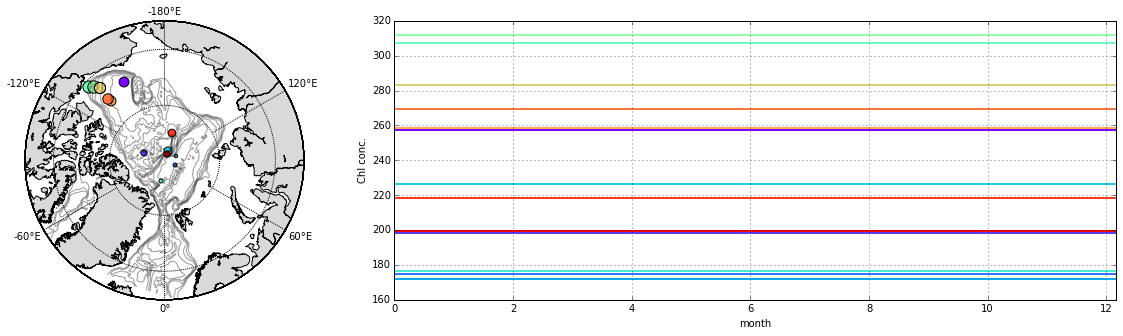

In [175]:
# yearly chl. , averaged from the first 40meter

fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 3)
axes = fig.add_subplot(gs[1:])

for N,c in zip(n,colors):
    avgchl=np.average(chl[:,xLoc[N],yLoc[N]],axis=0)
    plt.axhline(y=avgchl,lw=2,color=c)
    #plt.plot(chl[:,xLoc[N],yLoc[N]],color=c,lw=2.5,alpha=0.8)
plt.ylabel('Chl conc.')
plt.xlabel('month')
plt.xlim(0,73)
plt.xticks(np.linspace(0, 72, 7) )
a=axes.get_xticks().tolist()
for i in range (len(a)):
    a[i]=np.int(a[i]/6)
axes.set_xticklabels(a)
plt.grid()

ax =  fig.add_subplot(gs[0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='k')
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1],color='k')
x_lon, y_lat = m(nav_lon, nav_lat)
m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)
for N,c in zip(n,colors):
    avgchl=np.average(chl[:,xLoc[N],yLoc[N]],axis=0)
    m.scatter(x_lon[xLoc[N],yLoc[N]],y_lat[xLoc[N],yLoc[N]],s=(avgchl-160.),c=c)
    

plt.show()

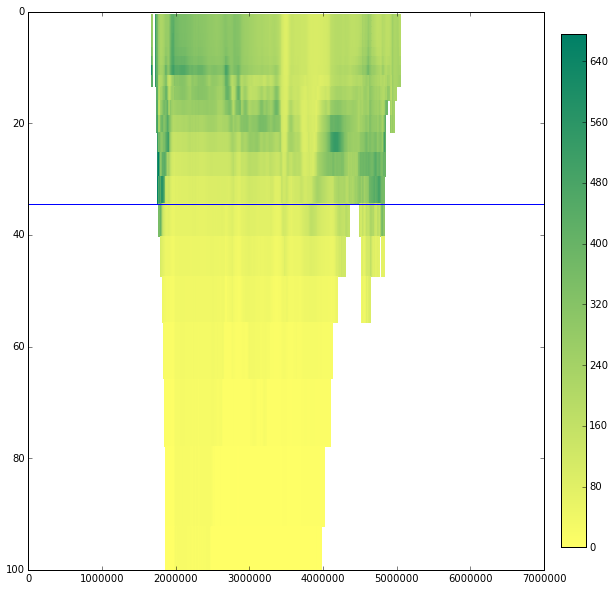

In [86]:
# Take a look at the vertical structures

# read data
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/yearly/*.nc'))
grid=nc.Dataset(nc_filename[0])
chl=grid.variables['chl'][:]
dep=grid.variables['deptht'][:]
chl=np.ma.masked_where(tmask==0, chl)

#plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
x_lon, y_lat = m(nav_lon, nav_lat)
plt.pcolor(x_lon[700,:],dep[:],chl[0,:,700,:],cmap='summer_r')
plt.colorbar(fraction=0.046,pad=0.03)
plt.ylim([0,100])
plt.axhline(dep[15])
plt.gca().invert_yaxis()
plt.show()

In [24]:
def plot(filenum,layer,avg=False):

    grid=nc.Dataset(nc_filename[filenum])
    chl=grid.variables['chl'][:]
    dep=grid.variables['deptht'][:]
    chl=np.ma.masked_where(tmask==0, chl)
    if avg==False:
        chl=np.ma.masked_where(nav_lat<70, chl[0,layer,:,:])
        chl=np.ma.masked_where(bathy<500, chl)
    else:
        chl=np.average(chl[0,0:layer+1,:,:],axis=0)
        chl=np.ma.masked_where(bathy<500, chl)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False)
    m.drawcoastlines()
    m.fillcontinents(color = '0.85')
    m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=80)
    m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=80)
    
    
    x_lon, y_lat = m(nav_lon, nav_lat)
    m.contour(x_lon[520:-10,:],y_lat[520:-10,:],bathy[520:-10,:],linewidth=0.075,colors='black',alpha=0.4)
    if avg==False:
        plt.title('Chl : %s (depth: %s m)'%(nc_filename[filenum][-14:-3],dep[layer]))
        m.pcolor(x_lon[520:-10,:],y_lat[520:-10,:],chl[520:-10,:],cmap='summer_r')
        plt.colorbar(fraction=0.046,pad=0.03)
    else:
        plt.title('Chl : %s (depth averaged)'%(nc_filename[filenum][-14:-3]))
        m.pcolor(x_lon[520:-10,:],y_lat[520:-10,:],chl[520:-10,:],vmin=chl[520:-10,:].min(),\
                 vmax=chl[520:-10,:].max()*0.6,cmap='summer_r')
        plt.colorbar(fraction=0.046,pad=0.03)
    plt.show()


#### yearly average Chl in 1983 at different depth

In [25]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/yearly/*.nc'))
print("%s"%(nc_filename))

['/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/yearly/ANHA4-ENG3_gridT_y1983.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/yearly/ANHA4-ENG3_gridT_y1987.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/yearly/ANHA4-ENG3_gridT_y1991.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/yearly/ANHA4-ENG3_gridT_y2000.nc']


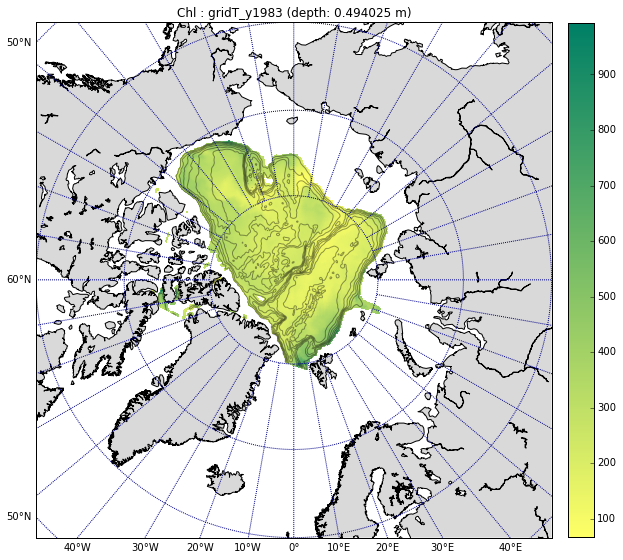

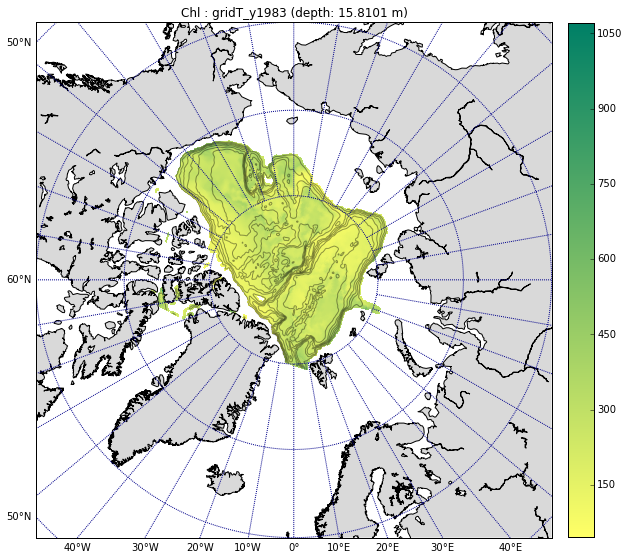

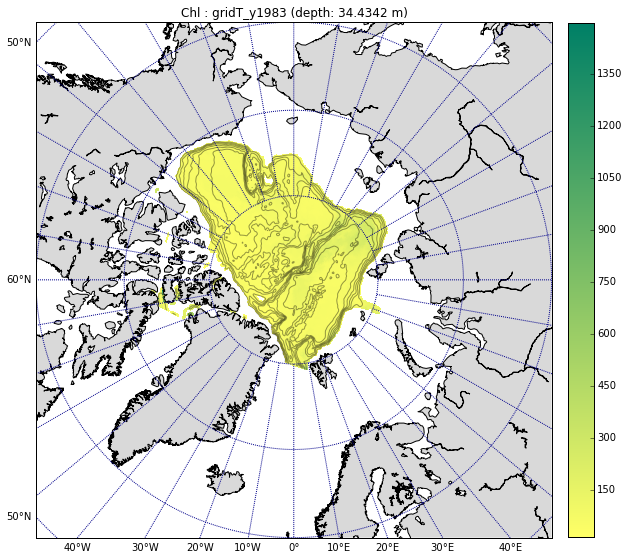

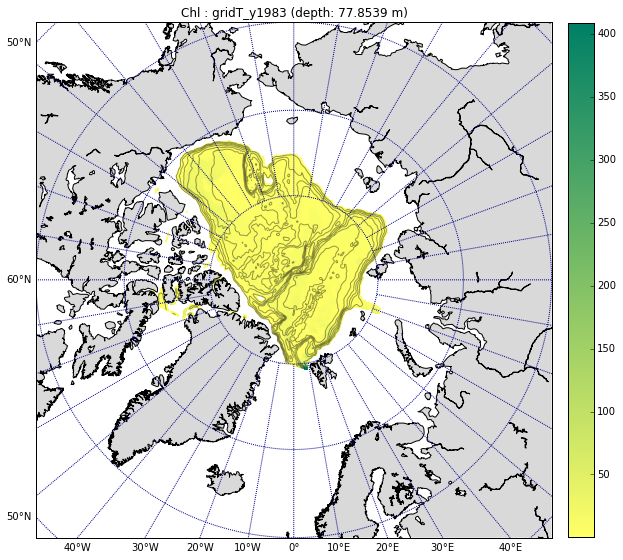

In [26]:
plot(0,0,avg=False)
plot(0,10,avg=False)
plot(0,15,avg=False)
plot(0,20,avg=False)
# The plots indicate the Chl decreased with depth. 
# They are high at the surface ( more specifit, in the first 15 meter).

#### yearly averged Chl for the top 40 m

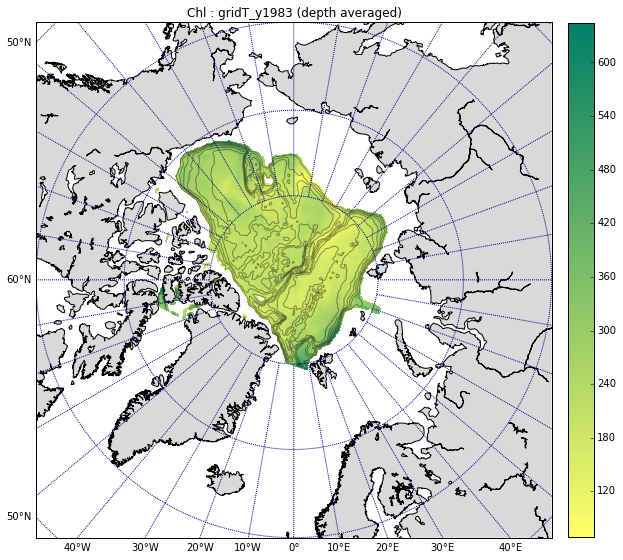

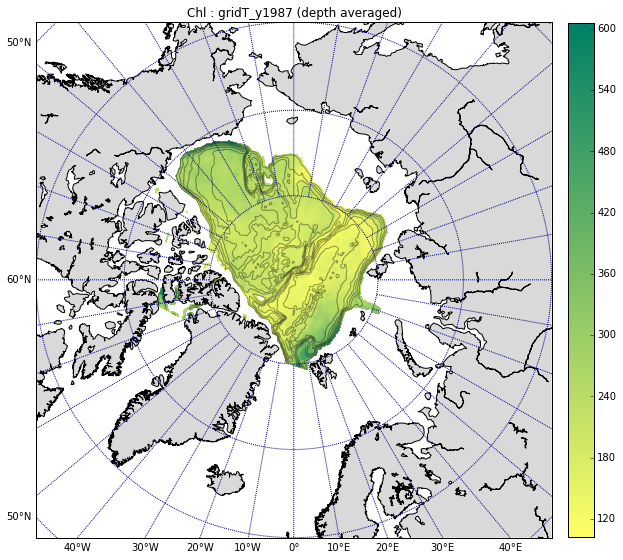

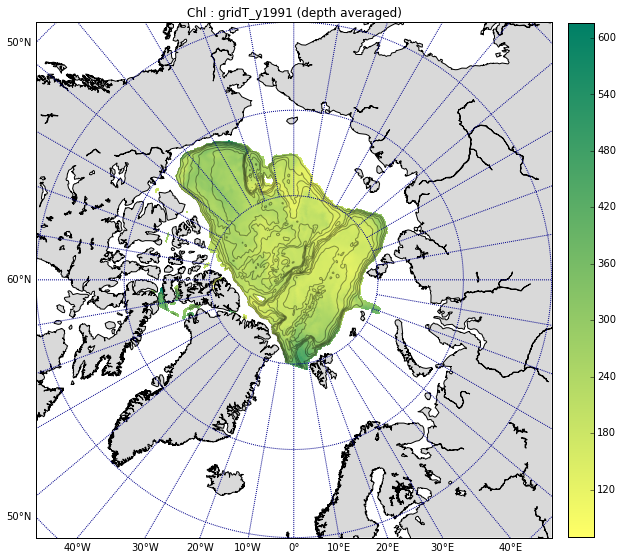

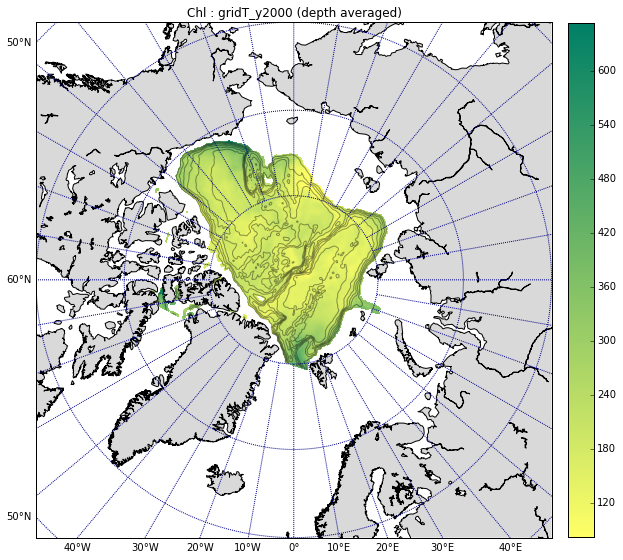

In [17]:
plot(0,15,avg=True)
plot(1,15,avg=True)
plot(2,15,avg=True)
plot(3,15,avg=True)

#### summer Chl in July, Aug, Sep

(ps. people have seen earier bloom than the real world in BLING)

['/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1983m07.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1987m07.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1991m07.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y2000m07.nc']


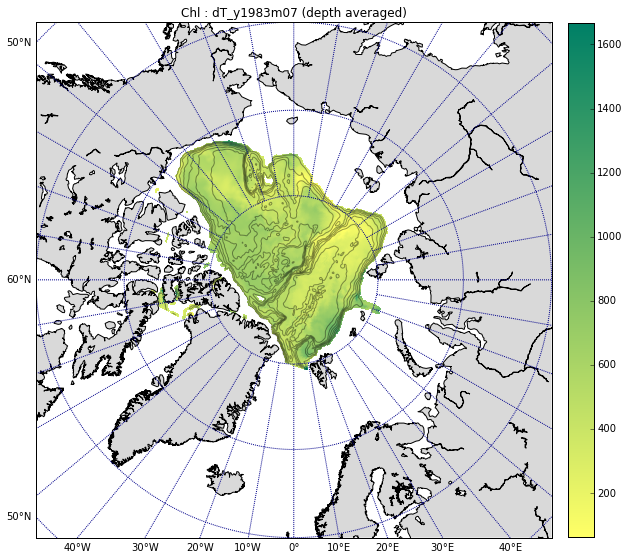

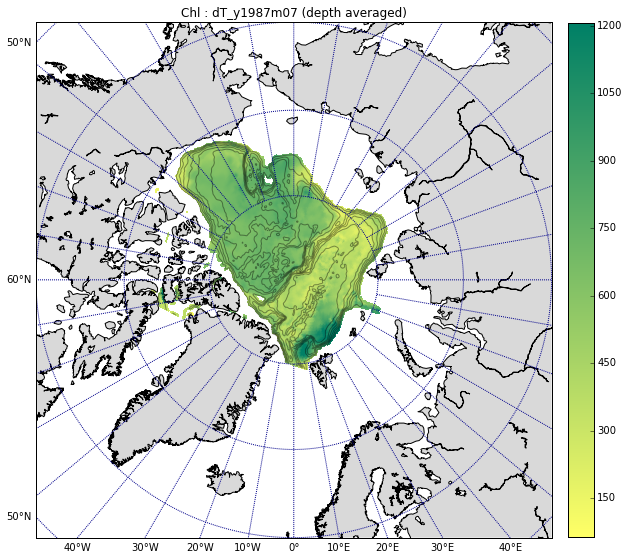

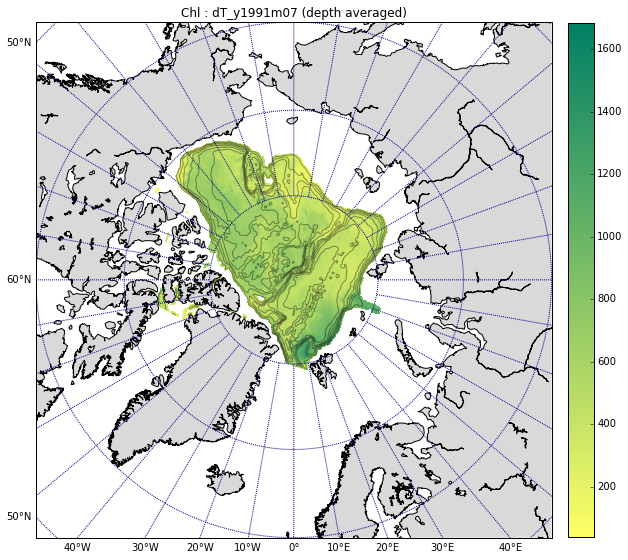

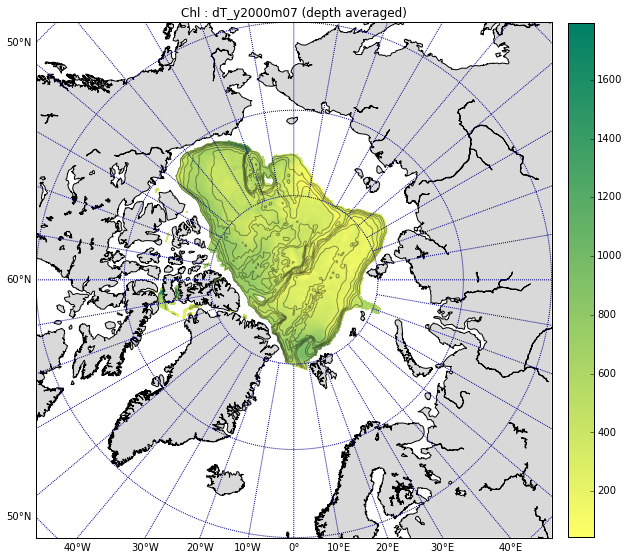

In [20]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/*07.nc'))
print("%s"%(nc_filename))
plot(0,15,avg=True)
plot(1,15,avg=True)
plot(2,15,avg=True)
plot(3,15,avg=True)

In [18]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/*08.nc'))
print("%s"%(nc_filename))

['/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1983m08.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1987m08.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1991m08.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y2000m08.nc']


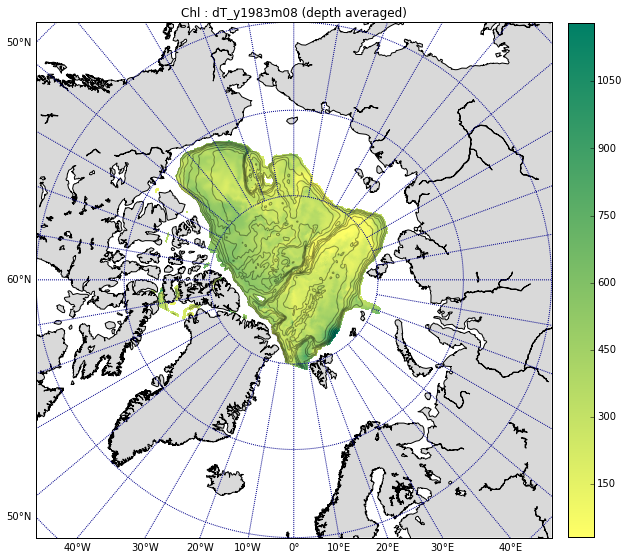

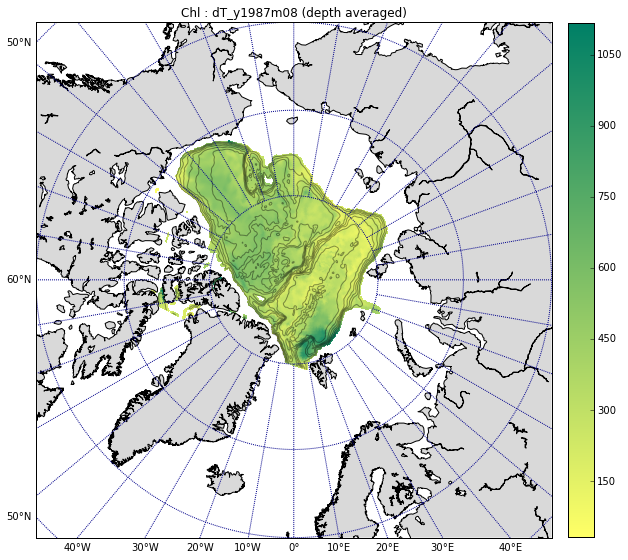

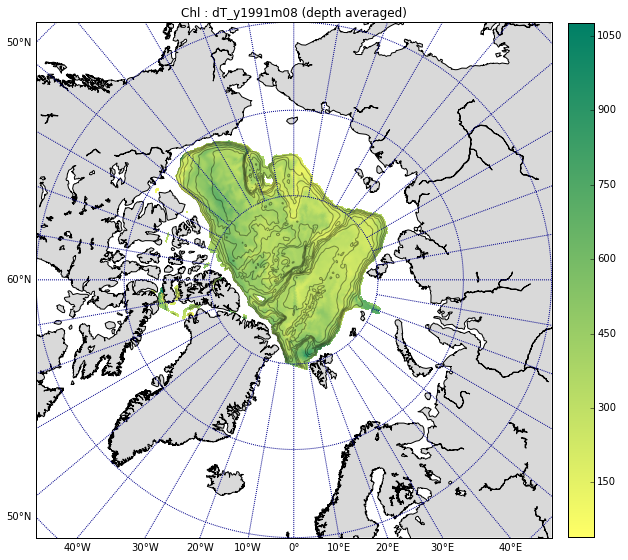

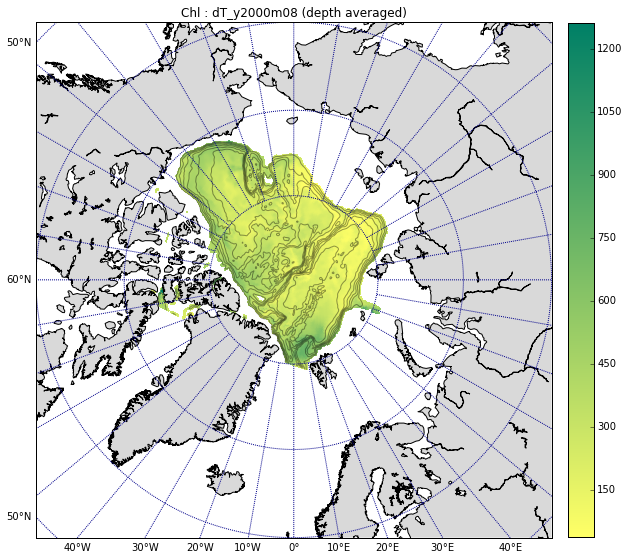

In [19]:
plot(0,15,avg=True)
plot(1,15,avg=True)
plot(2,15,avg=True)
plot(3,15,avg=True)

['/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1983m09.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1987m09.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y1991m09.nc', '/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/ANHA4-ENG3_gridT_y2000m09.nc']


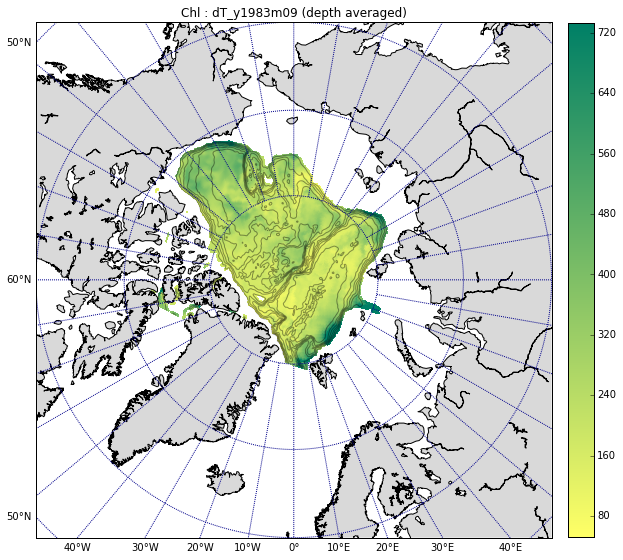

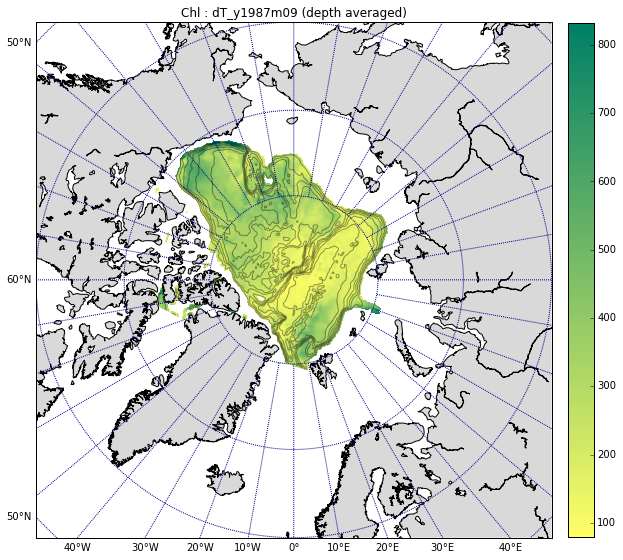

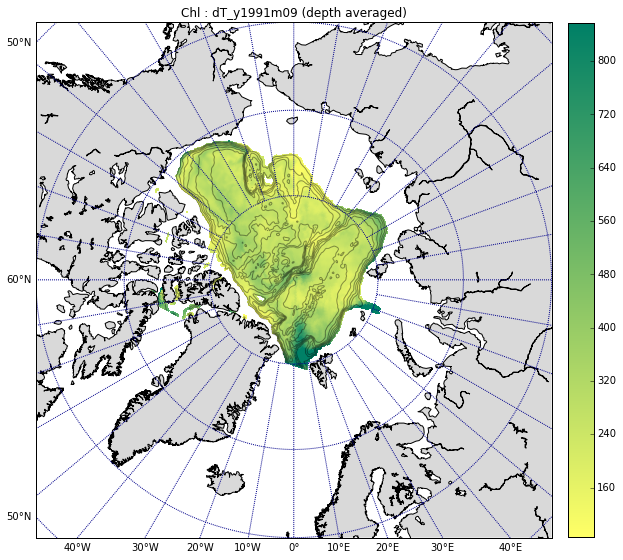

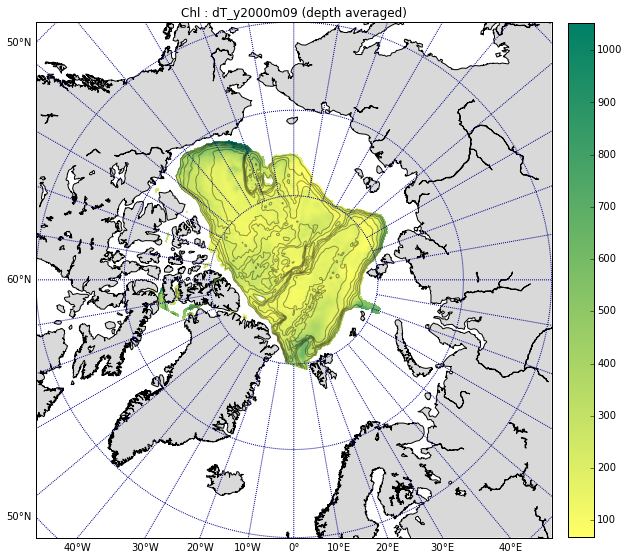

In [21]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/forcing/ANHA3-ENG3/monthly/*09.nc'))
print("%s"%(nc_filename))

plot(0,15,avg=True)
plot(1,15,avg=True)
plot(2,15,avg=True)
plot(3,15,avg=True)